In [242]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data exploration**

In [243]:
file_path = '/content/drive/My Drive/Colab Notebooks/Colab/Rent Brazil/rent.csv'
df = pd.read_csv(file_path).drop(["total (R$)"], axis=1)
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1002.5+ KB


In [245]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11


In [246]:
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155
10691,São Paulo,80,2,1,0,-,acept,not furnished,0,1400,165,22


In [247]:
df.shape

(10692, 12)

In [248]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000


In [ ]:
df.duplicated().sum()

358

In [250]:
df = df.drop_duplicates()

In [251]:
df.shape

(10334, 12)

In [252]:
df = df.rename(columns={"bathroom": "bathrooms", "hoa (R$)": "hoa", "rent amount (R$)": "rent amount", 'property tax (R$)': 'property tax', 'fire insurance (R$)': 'fire insurance' }, errors="raise")
df

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155


In [253]:
print(df["city"].unique())
print(df["floor"].unique())
print(df["animal"].unique())
print(df["furniture"].unique())

['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
['acept' 'not acept']
['furnished' 'not furnished']


In [254]:
df.head()

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11


In [255]:
df.loc[:, 'city'] = df["city"].map(lambda x: 1 if x == "São Paulo"
                            else 2 if x == "Porto Alegre"
                            else 3 if x == "Rio de Janeiro"
                            else 4 if x =="Campinas" else 5)

In [256]:
df.loc[:, 'furniture'] = df['furniture'].map({'furnished': 1, 'not furnished': 0})
df.loc[:, 'animal'] = df['animal'].map({'acept': 1, 'not acept': 0})

# df["floor"] = df["floor"].replace({"-": "0"}).astype(int)
# df.loc[:, 'floor'] = df['floor'].map({'-': "0"})

In [257]:
# df['animal'] = df['animal'].map({'not acept': 0, 'acept': 1})
# df.loc[:, 'floor'] = df["floor"].replace({"-": "0"}).astype(int)
df.loc[:, 'floor'] = df["floor"].str.replace("-", "0").astype(int)

# df.loc[:, 'floor'] = df['floor'].map({'-': "0"})

In [258]:
df.head()

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
0,1,70,2,1,1,7,1,1,2065,3300,211,42
1,1,320,4,4,0,20,1,0,1200,4960,1750,63
2,2,80,1,1,1,6,1,0,1000,2800,0,41
3,2,51,2,1,0,2,1,0,270,1112,22,17
4,1,25,1,1,0,1,0,0,0,800,25,11


In [259]:
print(df["city"].unique())
print(df["floor"].unique())
print(df["animal"].unique())
print(df["furniture"].unique())

[1 2 3 4 5]
[7 20 6 2 1 0 4 3 10 11 24 9 8 17 18 5 13 15 16 14 26 12 21 19 22 27 23 35
 25 46 28 29 301 51 32]
[1 0]
[1 0]


In [260]:
corr_matrix = df.corr()
corr_matrix

,city,area,rooms,bathrooms,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance
city,1.000000,0.009788,0.052602,-0.091129,-0.070714,-0.092612,0.005173,-0.104823,0.000988,-0.170239,-0.034820,-0.141417
area,0.009788,1.000000,0.191251,0.224388,0.191421,-0.013849,0.038712,0.009249,0.009085,0.178228,0.038453,0.185652
rooms,0.052602,0.191251,1.000000,0.730469,0.611634,-0.086562,0.165436,-0.075677,0.020466,0.536632,0.073539,0.560907
bathrooms,-0.091129,0.224388,0.730469,1.000000,0.693952,0.000087,0.114685,0.023140,0.057297,0.665625,0.108083,0.673771
parking spaces,-0.070714,0.191421,0.611634,0.693952,1.000000,-0.026981,0.124266,-0.003788,0.021100,0.573997,0.097159,0.593557
floor,-0.092612,-0.013849,-0.086562,0.000087,-0.026981,1.000000,-0.033619,0.115293,0.029019,0.070565,0.012016,0.009841
animal,0.005173,0.038712,0.165436,0.114685,0.124266,-0.033619,1.000000,-0.081020,-0.013845,0.064576,-0.004238,0.076535
furniture,-0.104823,0.009249,-0.075677,0.023140,-0.003788,0.115293,-0.081020,1.000000,0.009767,0.166975,0.001147,0.144082
hoa,0.000988,0.009085,0.020466,0.057297,0.021100,0.029019,-0.013845,0.009767,1.000000,0.052516,0.011267,0.042833
rent amount,-0.170239,0.178228,0.536632,0.665625,0.573997,0.070565,0.064576,0.166975,0.052516,1.000000,0.106679,0.987203


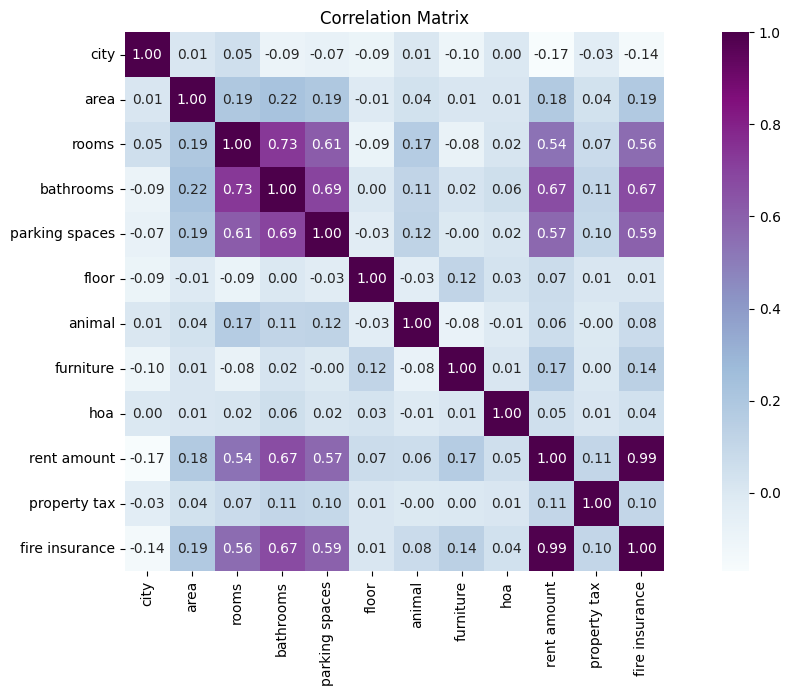

In [261]:
plt.figure(figsize=(15, 7))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', fmt='.2f', square=True, cbar=True)
plt.show()

In [262]:
corr_rent_amount = corr_matrix['rent amount'].sort_values(ascending=False)
corr_rent_amount

,rent amount
rent amount,1.000000
fire insurance,0.987203
bathrooms,0.665625
parking spaces,0.573997
rooms,0.536632
area,0.178228
furniture,0.166975
property tax,0.106679
floor,0.070565
animal,0.064576


<ipython-input-263-393b3bc63cc1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")


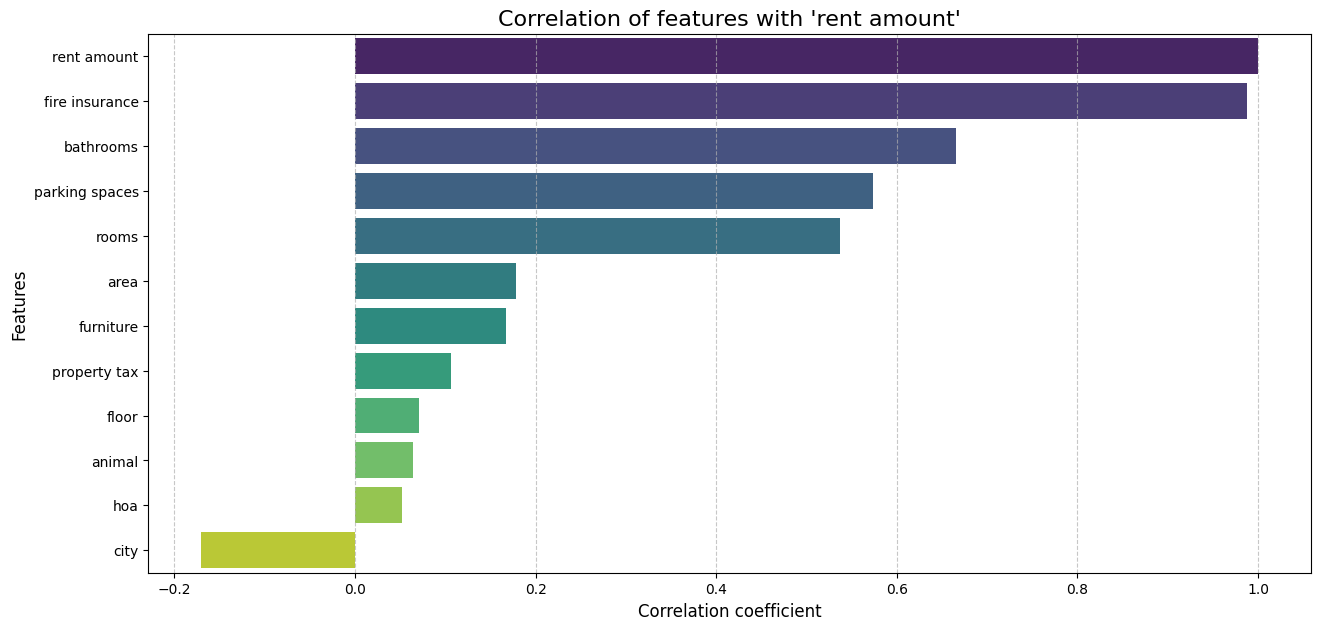

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))

sns.barplot(x=corr_rent_amount.values, y=corr_rent_amount.index, palette="viridis")

plt.title("Correlation of features with 'rent amount'", fontsize=16)
plt.xlabel("Correlation coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

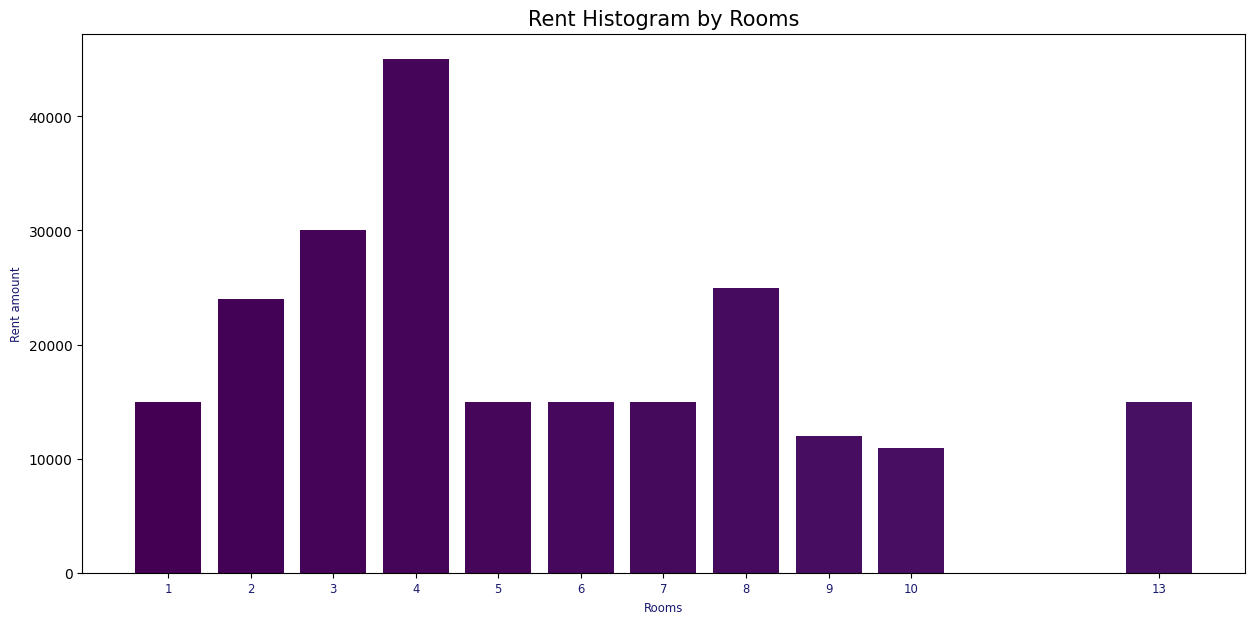

In [264]:
unique_rooms = sorted(df['rooms'].unique())

colors = plt.cm.viridis(range(len(unique_rooms)))

plt.figure(figsize=(15, 7))

plt.bar(
    df['rooms'],
    df['rent amount'],
    color=[colors[unique_rooms.index(room)] for room in df['rooms']]
)

plt.xticks(unique_rooms, labels=unique_rooms, fontsize="small", rotation=0, color="midnightblue")

plt.xlabel("Rooms", fontsize="small", color="midnightblue")
plt.ylabel("Rent amount", fontsize="small", color="midnightblue")
plt.title("Rent Histogram by Rooms", fontsize=15)

plt.show()
